In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
%matplotlib inline

# 514 Programming Assignment 2
#### Group: Rashaan, Ravi, David

Data additional information
Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. 
Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. 
There is one Class attribute that describes the "Poker Hand". 
The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4

#### Load dataset

In [168]:
# Column names for the dataset
# Define the column names for your dataset
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']

# Load your dataset
training_data = pd.read_csv('poker-hand-training-true.csv', header=None, names=columns)
testing_data = pd.read_csv('poker-hand-testing.csv', header=None, names=columns)

# Adjust the ranks of cards, specifically changing Ace from 1 to 14
def adjust_ranks(data):
    for i in range(1, 6):  # For each card in the hand
        data[f'C{i}'] = data[f'C{i}'].apply(lambda x: 14 if x == 1 else x)
    return data

# One-hot encode the suits of the cards
def one_hot_encode_suits(data):
    for i in range(1, 6):  # For each card in the hand
        data = pd.concat([data, pd.get_dummies(data[f'S{i}'], prefix=f'S{i}')], axis=1).drop([f'S{i}'], axis=1)
    return data

# Apply preprocessing steps
def preprocess_data(data):
    data = adjust_ranks(data)
    data = one_hot_encode_suits(data)
    return data

training_data_preprocessed = preprocess_data(training_data)
testing_data_preprocessed = preprocess_data(testing_data)


# Naïve Bayes Classifier - Part B

In [169]:
from sklearn.naive_bayes import CategoricalNB,BernoulliNB,MultinomialNB,GaussianNB,ComplementNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report,confusion_matrix

##### PREPARE THE TRAINING AND TESTING SETS

In [170]:
def adjust_class(data):
        bad,good,great = 0,4,9
        #BAD
        data['Class'] = data['Class'].apply(lambda x: bad if x == 0 else x)
        data['Class'] = data['Class'].apply(lambda x: bad if x == 1 else x)
        data['Class'] = data['Class'].apply(lambda x: bad if x == 2 else x)
        data['Class'] = data['Class'].apply(lambda x: bad if x == 3 else x)
        #GOOD
        data['Class'] = data['Class'].apply(lambda x: good if x == 4 else x)
        data['Class'] = data['Class'].apply(lambda x: good if x == 5 else x)
        data['Class'] = data['Class'].apply(lambda x: good if x == 6 else x)
        #GREAT
        data['Class'] = data['Class'].apply(lambda x: great if x == 7 else x)
        data['Class'] = data['Class'].apply(lambda x: great if x == 8 else x)
        data['Class'] = data['Class'].apply(lambda x: great if x == 9 else x)
        return data

def remove_val_df(df,v):
    temp_df = copy.deepcopy(adjust_class(df))   
    indexClass = temp_df[(temp_df['Class']==v)].index
    temp_df.drop(indexClass,inplace=True)
    return temp_df

In [171]:
df_rm_0 = remove_val_df(training_data_preprocessed,0)
df_rm_4 = remove_val_df(training_data_preprocessed,4)
df_rm_9 = remove_val_df(training_data_preprocessed,9)

In [172]:
# CLASS 1: ONLY GOOD AND GREAT ###########
x_train_0 = df_rm_0[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_train_0 = pd.DataFrame(df_rm_0['Class'])

x_test_0 = df_rm_0[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_test_0 = pd.DataFrame(df_rm_0['Class'])

# CLASS 2: ONLY BAD AND GREAT ###########
x_train_4 = df_rm_4[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_train_4 = pd.DataFrame(df_rm_4['Class'])

x_test_4 = df_rm_4[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_test_4 = pd.DataFrame(df_rm_4['Class'])

# CLASS 3: ONLY BAD AND GOOD ###########
x_train_9 = df_rm_9[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_train_9 = pd.DataFrame(df_rm_9['Class'])

x_test_9 = df_rm_9[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_test_9 = pd.DataFrame(df_rm_9['Class'])

# CLASS EC: ALL ###########
x_train_all = training_data_preprocessed[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_train_all = pd.DataFrame(training_data_preprocessed['Class'])

x_test_all = training_data_preprocessed[['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4',
       'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1',
       'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']]

y_test_all = pd.DataFrame(training_data_preprocessed['Class'])

In [173]:
def five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.33,0.33,0.33],class_=[0,4,9],alp=0.5):
    cnb = CategoricalNB(alpha=alp,force_alpha=True,class_prior=prior)
    ### FOLDS ####
    folds = StratifiedKFold(n_splits=5)
    cv_folds = folds.split(x_train,y_train)
    x_,y_,x_t,y_t = [],[],[],[]
    for i, (train_index, test_index) in enumerate(cv_folds):
        temp_x,temp_y = copy.deepcopy(x_train.iloc[train_index]),copy.deepcopy(y_train.iloc[train_index])
        temp_x_test,temp_y_test = copy.deepcopy(x_train.iloc[test_index]),copy.deepcopy(y_train.iloc[test_index])
        x_.append(temp_x)
        y_.append(temp_y)
        x_t.append(temp_x_test)
        y_t.append(temp_y_test)
    #FOLD 1
    x_train_float_fold1 = x_[0]
    y_train_float_fold1 = adjust_class(y_[0]).values.ravel()
    
    x_train_float_fold1_t = x_t[0]
    y_train_float_fold1_t = adjust_class(y_t[0]).values.ravel()

    #FOLD 2
    x_train_float_fold2 = x_[1]
    y_train_float_fold2 = adjust_class(y_[1]).values.ravel()
    
    x_train_float_fold2_t = x_t[1]
    y_train_float_fold2_t = adjust_class(y_t[1]).values.ravel()
    
    #FOLD 3
    x_train_float_fold3 = x_[2]
    y_train_float_fold3 = adjust_class(y_[2]).values.ravel()
    
    x_train_float_fold3_t = x_t[2]
    y_train_float_fold3_t = adjust_class(y_t[2]).values.ravel()

    #FOLD 4
    x_train_float_fold4 = x_[3]
    y_train_float_fold4 = adjust_class(y_[3]).values.ravel()
    
    x_train_float_fold4_t = x_t[3]
    y_train_float_fold4_t = adjust_class(y_t[3]).values.ravel()

    #FOLD 5
    x_train_float_fold5 = x_[4]
    y_train_float_fold5 = adjust_class(y_[4]).values.ravel()
    
    x_train_float_fold5_t = x_t[4]
    y_train_float_fold5_t = adjust_class(y_t[4]).values.ravel()
    
    
    ### TESTING ###
    models = []
    loss = []
    scores = []
    mod_score = []
    pred,curr_err = 0,0
    error = []
    acc = []
    
    #########
    w_ = np.ones(len(x_train_float_fold1))/3
    
    ###### 1 #######
    model1 = cnb.partial_fit(x_train_float_fold1,y_train_float_fold1,classes=class_,sample_weight=w_)
    models.append(model1)
    mod_score.append(model1.score(x_train_float_fold1,y_train_float_fold1))
    scores.append(cross_val_score(model1, x_train_float_fold1_t, y_train_float_fold1_t, scoring='accuracy'))
    pred = model1.predict(x_train_float_fold1_t)
    curr_err = mean_squared_error(y_train_float_fold1_t,pred)
    error.append(curr_err)
    acc.append(accuracy_score(y_train_float_fold1_t,pred))
    
    ###### 2 #######
    model2 = copy.deepcopy(model1)
    model2 = cnb.partial_fit(x_train_float_fold2,y_train_float_fold2,classes=class_)
    models.append(model2)
    mod_score.append(model2.score(x_train_float_fold2_t,y_train_float_fold2_t))
    scores.append(cross_val_score(model2, x_train_float_fold2_t, y_train_float_fold2_t, scoring='accuracy'))
    pred = model2.predict(x_train_float_fold2_t)
    curr_err = mean_squared_error(y_train_float_fold2_t,pred)
    error.append(curr_err)
    acc.append(accuracy_score(y_train_float_fold2_t,pred))
    
    ###### 3 #######
    model3 = copy.deepcopy(model2)
    model3 = cnb.partial_fit(x_train_float_fold3,y_train_float_fold3,classes=class_)
    models.append(model3)
    mod_score.append(model3.score(x_train_float_fold3_t,y_train_float_fold3_t))
    scores.append(cross_val_score(model3, x_train_float_fold3_t, y_train_float_fold3_t, scoring='accuracy'))
    pred = model3.predict(x_train_float_fold3_t)
    curr_err = mean_squared_error(y_train_float_fold3_t,pred)
    error.append(curr_err)
    acc.append(accuracy_score(y_train_float_fold3_t,pred))
    
    ###### 4 #######
    model4 = copy.deepcopy(model3)
    model4 = cnb.partial_fit(x_train_float_fold4,y_train_float_fold4,classes=class_)
    models.append(model4)
    mod_score.append(model4.score(x_train_float_fold4_t,y_train_float_fold4_t))
    scores.append(cross_val_score(model4, x_train_float_fold4_t, y_train_float_fold4_t, scoring='accuracy'))
    pred = model4.predict(x_train_float_fold4_t)
    curr_err = mean_squared_error(y_train_float_fold4_t,pred)
    error.append(curr_err)
    acc.append(accuracy_score(y_train_float_fold4_t,pred))
    
    ###### 5 #######
    model5 = copy.deepcopy(model4)
    model5 = cnb.partial_fit(x_train_float_fold5,y_train_float_fold5,classes=class_)
    models.append(model5)
    mod_score.append(model5.score(x_train_float_fold5,y_train_float_fold5))
    scores.append(cross_val_score(model5, x_train_float_fold5_t, y_train_float_fold5_t, scoring='accuracy'))
    pred = model5.predict(x_train_float_fold5_t)
    curr_err = mean_squared_error(y_train_float_fold5_t,pred)
    error.append(curr_err)
    acc.append(accuracy_score(y_train_float_fold5_t,pred))
    
    return models,scores,error,acc,mod_score

In [174]:
def plot_score(data,fig,side):
    colors = ['r','g','b','k','c']
    plt.plot(pd.DataFrame(data))
    for i in range(len(data)):
        plt.plot(i,data[i],colors[i],label='fold '+str(i),marker='o')
    plt.title("Naïve Bayes Classifier Model: 5Fold-CV: " + str(fig) + " vs Fold_Iteration")
    plt.xlabel("Fold_Iteration")
    plt.ylabel(str(fig))
    plt.legend(loc="upper "+side)
    plt.show()

In [175]:
x_train = x_train_all
y_train = y_train_all
x_test = x_test_all
y_test  = y_test_all

models_all,scores_all,error_all,acc_all,mod_score_all = five_fold_CV_NBC(x_train,y_train,x_test,y_test)

/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, whi

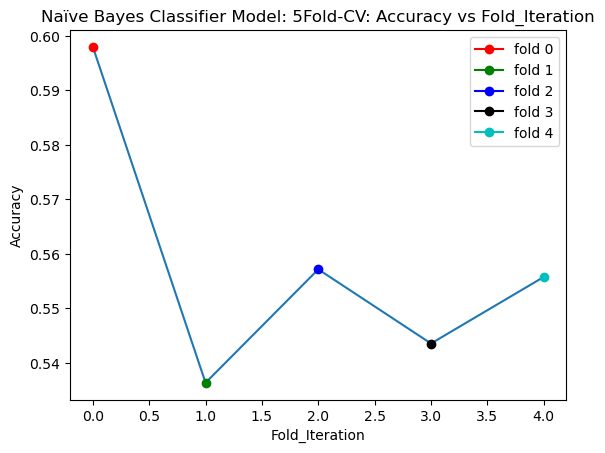

In [176]:
plot_score(acc_all,'Accuracy','right')

In [177]:
x_train = x_train_0
y_train = y_train_0
x_test = x_test_0
y_test  = y_test_0

models_0,scores_0,error_0,acc_0,mod_score_0 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.5,0.5],class_=[4,9])

/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "p

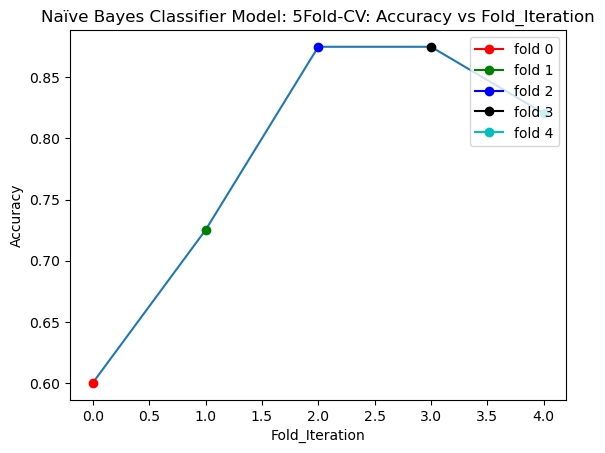

In [178]:
plot_score(acc_0,'Accuracy','right')

In [179]:
x_train = x_train_4
y_train = y_train_4
x_test = x_test_4
y_test  = y_test_4

models_4,scores_4,error_4,acc_4,mod_score_4 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.5,0.5],class_=[0,9])

/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, whi

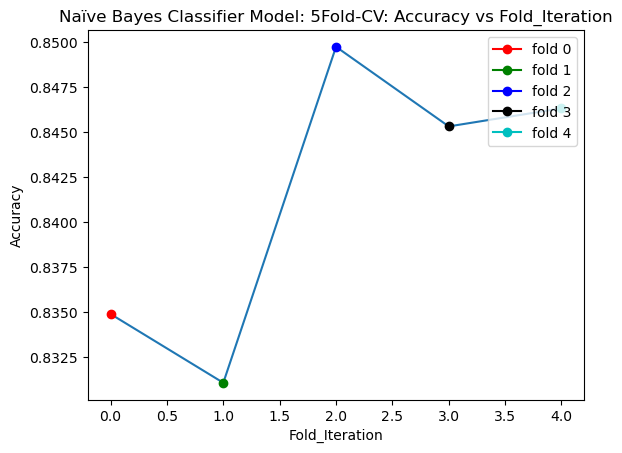

In [180]:
plot_score(acc_4,'Accuracy','right')

# CLASS 1: Good and Great

In [181]:
%%time
x_train = x_train_0
y_train = y_train_0
x_test = x_test_0
y_test  = y_test_0

models_0,scores_0,error_0,acc_0,mod_score_0 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.75,0.25],class_=[4,9])

CPU times: user 168 ms, sys: 5.62 ms, total: 174 ms
Wall time: 170 ms


/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "p

In [182]:
sum(mod_score_0)/5

0.9186635220125787

In [183]:
%%time
pred = models_0[4].predict(x_test)

CPU times: user 2.12 ms, sys: 1.21 ms, total: 3.33 ms
Wall time: 2.27 ms


In [184]:
accuracy_score(y_test,pred)

0.9296482412060302

In [185]:
sum(error_0)/5

2.8878205128205128

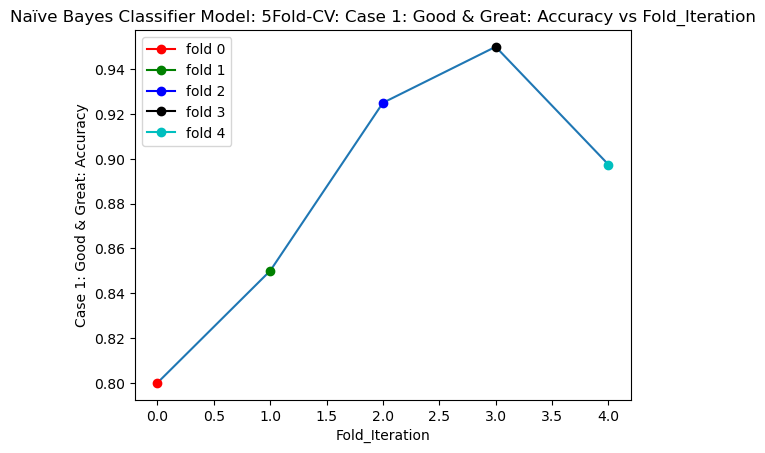

In [186]:
plot_score(acc_0,'Case 1: Good & Great: Accuracy','left')

# CLASS 2: Bad and Great

In [187]:
%%time
x_train = x_train_4
y_train = y_train_4
x_test = x_test_4
y_test  = y_test_4

models_4,scores_4,error_4,acc_4,mod_score_4 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.75,0.25],class_=[0,9])

/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 590 ms, sys: 29.2 ms, total: 619 ms
Wall time: 619 ms


/Users/rashaanyapp/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [188]:
sum(mod_score_4)/5

0.9379400114164096

In [189]:
%%time
pred = models_4[4].predict(x_test)

CPU times: user 13.7 ms, sys: 3.39 ms, total: 17.1 ms
Wall time: 15.8 ms


In [190]:
accuracy_score(y_test,pred)

0.928021911628469

In [191]:
sum(error_4)/5

5.047278861819284

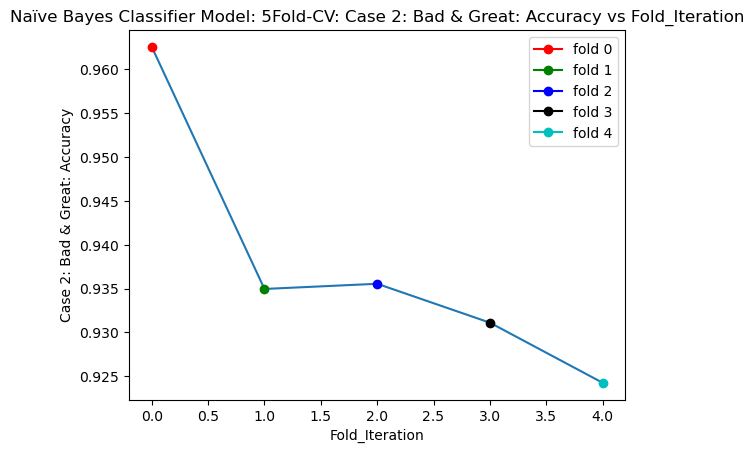

In [192]:
plot_score(acc_4,'Case 2: Bad & Great: Accuracy','right')

# CLASS 3: Bad and Good

In [193]:
x_train = x_train_9
y_train = y_train_9
x_test = x_test_9
y_test  = y_test_9

models_9,scores_9,error_9,acc_9,mod_score_9 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.5,0.5],class_=[0,4],alp=0.01)

In [194]:
sum(mod_score_9)/5

0.6322730392540123

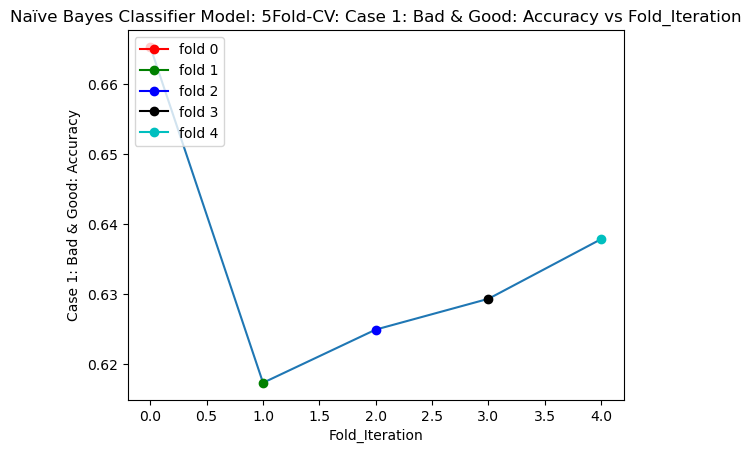

In [195]:
plot_score(acc_9,'Case 3: Bad & Good: Accuracy','left')

In [196]:
x_train = x_train_9
y_train = y_train_9
x_test = x_test_9
y_test  = y_test_9

models_9,scores_9,error_9,acc_9,mod_score_9 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.75,0.25],class_=[0,4],alp=0.01)

In [197]:
sum(mod_score_9)/5

0.9491792231914751

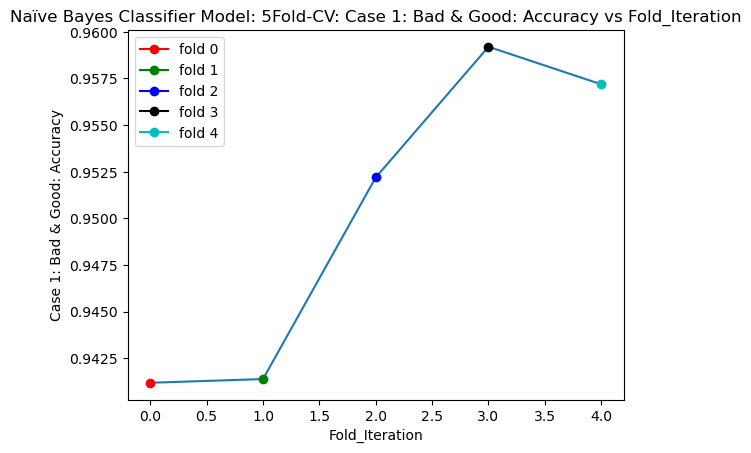

In [198]:
plot_score(acc_9,'Case 3: Bad & Good: Accuracy','left')

###### MODEL 3 USED IN CASE 3 START

In [218]:
%%time
x_train = x_train_9
y_train = y_train_9
x_test = x_test_9
y_test  = y_test_9

models_9,scores_9,error_9,acc_9,mod_score_9 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.75,0.25],class_=[0,4])

CPU times: user 584 ms, sys: 28.4 ms, total: 612 ms
Wall time: 611 ms


In [219]:
sum(mod_score_9)/5

0.9560907990550348

In [220]:
%%time
pred = models_9[4].predict(x_test)

CPU times: user 13.8 ms, sys: 1.69 ms, total: 15.5 ms
Wall time: 13.9 ms


In [221]:
accuracy_score(y_test,pred)

0.956669600704169

In [222]:
sum(error_9)/5

0.6958456757377887

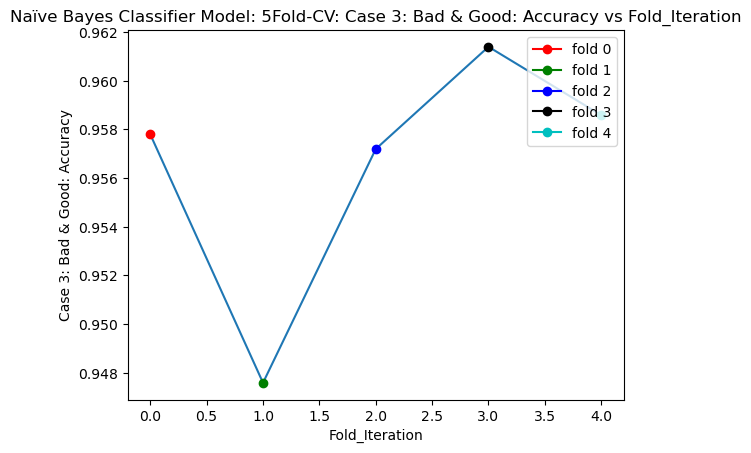

In [223]:
plot_score(acc_9,'Case 3: Bad & Good: Accuracy','right')

###### MODEL 3 USED IN CASE 3 END

In [205]:
x_train = x_train_9
y_train = y_train_9
x_test = x_test_9
y_test  = y_test_9

models_9,scores_9,error_9,acc_9,mod_score_9 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.5,0.5],class_=[0,4])

In [206]:
sum(mod_score_9)/5

0.6408249892038922

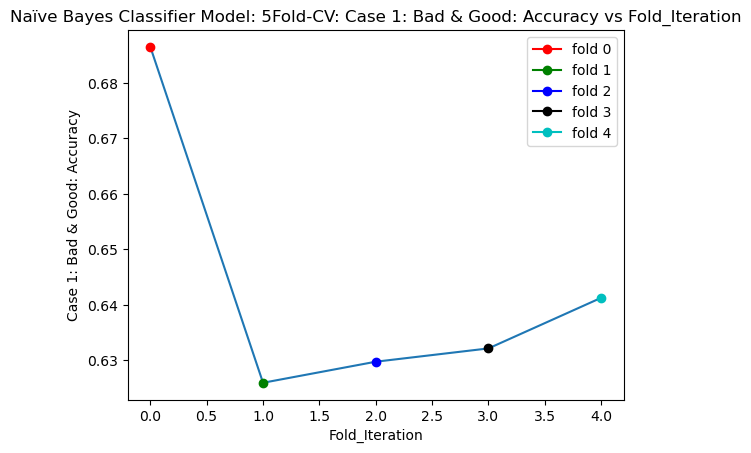

In [207]:
plot_score(acc_9,'Case 3: Bad & Good: Accuracy','right')

In [208]:
x_train = x_train_9
y_train = y_train_9
x_test = x_test_9
y_test  = y_test_9

models_9,scores_9,error_9,acc_9,mod_score_9 = five_fold_CV_NBC(x_train,y_train,x_test,y_test,prior=[0.25,0.75],class_=[0,4])

In [209]:
sum(mod_score_9)/5

0.20128261811402043

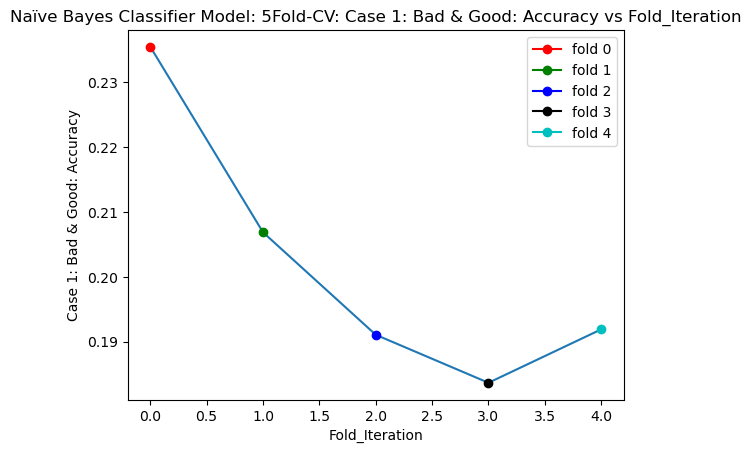

In [210]:
plot_score(acc_9,'Case 3: Bad & Good: Accuracy','right')

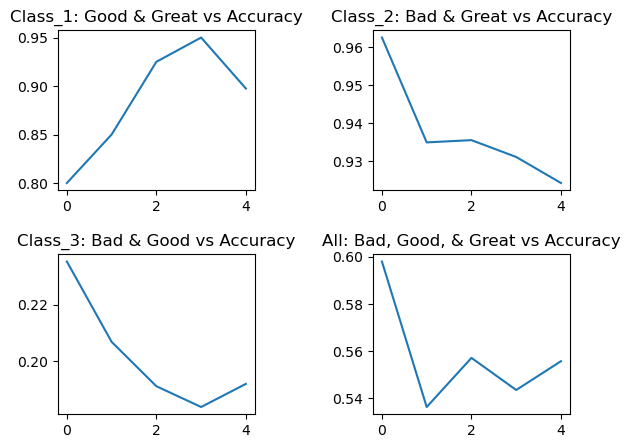

In [211]:
figure,axis=plt.subplots(2,2)
axis[0,0].plot(pd.DataFrame(acc_0))
axis[0,0].set_title("Class_1: Good & Great vs Accuracy")

axis[0,1].plot(pd.DataFrame(acc_4))
axis[0,1].set_title("Class_2: Bad & Great vs Accuracy")

axis[1,0].plot(pd.DataFrame(acc_9))
axis[1,0].set_title("Class_3: Bad & Good vs Accuracy")

axis[1,1].plot(pd.DataFrame(acc_all))
axis[1,1].set_title("All: Bad, Good, & Great vs Accuracy")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9, wspace=0.6,hspace=0.4)

plt.show()